In [2]:
import pickle
import shap
import pandas as pd
from sklearn.model_selection import train_test_split

import xgboost as xgb
import shap.benchmark as benchmark

In [8]:
def shap_analysis_model():
    with open("finalized_model.pkl", "rb") as file:
      model = pickle.load(file)
    with open("vectorizer.pkl", "rb") as file:
      vectorizer = pickle.load(file)

    data = pd.read_csv("data/reduced_data.csv")
    data = data.dropna(subset=["content"])

    X = data["content"]
    y = data["retweets"]

    _, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=31232)
    X_test = vectorizer.transform(X_test).toarray()

    explainer = shap.Explainer(model)
    shap_values = explainer(X_test)

    feature_names = vectorizer.get_feature_names_out()
    print("2579: " + feature_names[2579])
    print("2582: " + feature_names[2582])
    print("2677: " + feature_names[2677])
    print("2724: " + feature_names[2724])
    print("179: " + feature_names[179])
    print("2126: " + feature_names[2126])
    print("2632: " + feature_names[2632])
    print("1262: " + feature_names[1262])
    print("1834: " + feature_names[1834])

    shap.summary_plot(shap_values, feature_names=feature_names)
    shap.plots.waterfall(shap_values[0])
    shap.plots.beeswarm(shap_values)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


2579: thanks
2582: the
2677: true
2724: twitter
179: and
2126: realdonaldtrump
2632: to
1262: http
1834: of


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


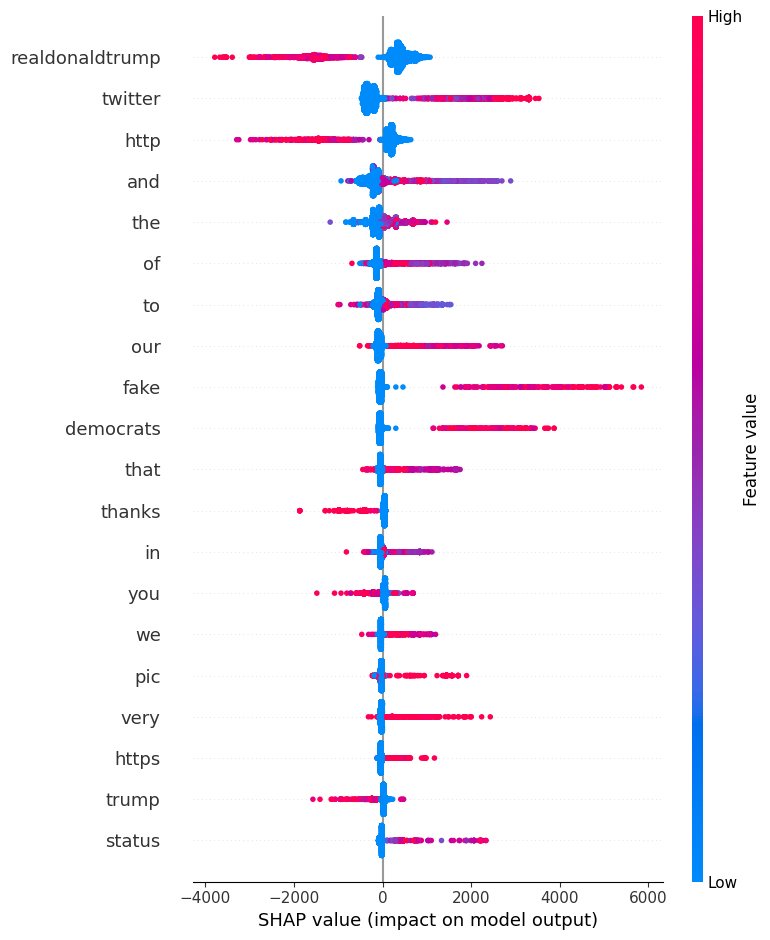

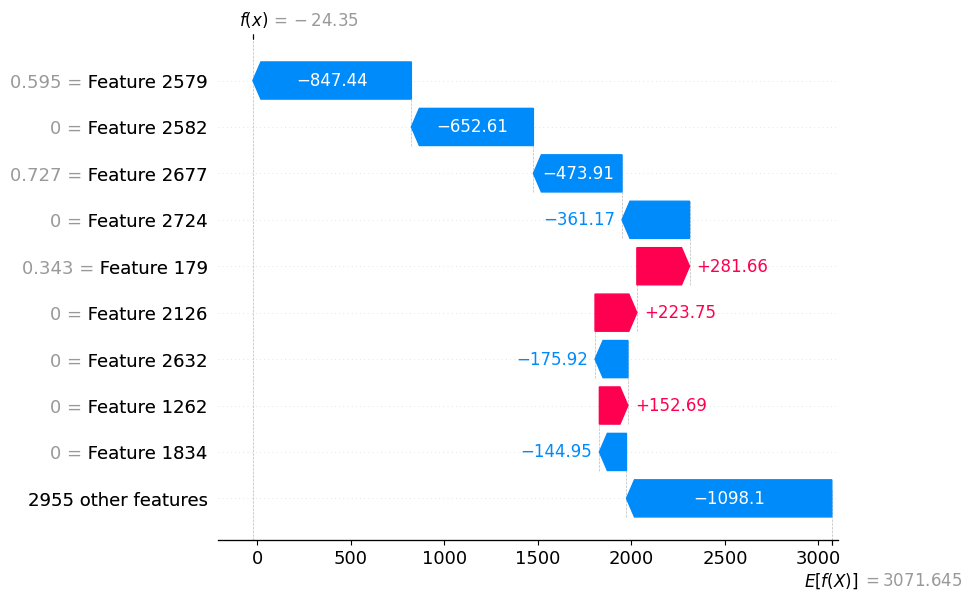

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


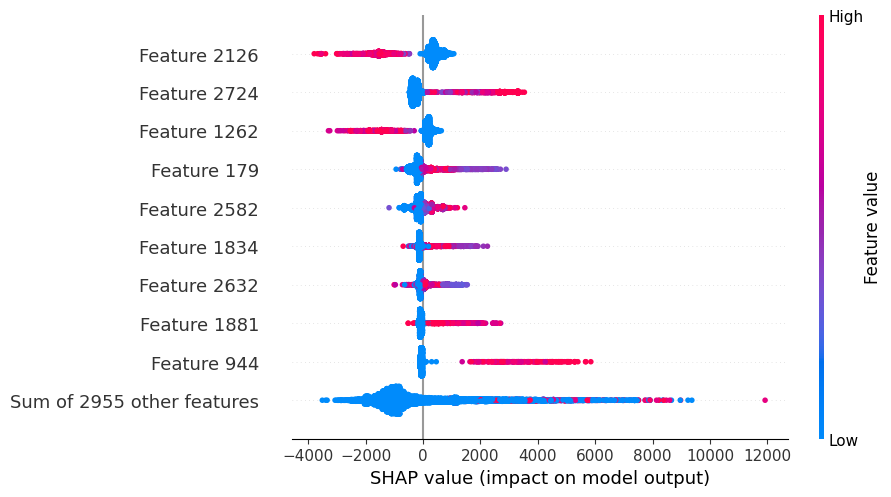

In [9]:
shap_analysis_model()